#1 Introduction


#1.1 Data Intoduction

##Dataset 1: Breast Cancer Wisconsin (Original) data set
from the breast cancer study by Dr. William H Wolberg at University of Wisconsin Hospitals from 1989 to 1991.

699 patients/instances containing information
about a cancer cell
  thickness, size, shape, nuclei etc.
  Benign (not aggressive/harmful) or Malignant (aggressive/harmful).

11 Attributes, all integers
*   Analyzing 10
*   Leaving the first attribute ID out

Information for each attribute:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)


##Dataset 2: Breast Cancer Wisconsin (Diagnostic)

Has information of 569 patients from the original
and additional study.

Features were taken from a digitized image of the
cancer mass, thus contain new information.

Describe characteristics of the nucleus of the cell.

32 attributes, all real numbers
*   569 instances
*   Attributes of interest: 3 - 32

Information for each attribute:
1.   ID number
2.   Diagnosis (M = malignant, B = benign)

Next 30 features are cell attributed for each of the 3 cells as floats:
*   radius
*   texture
*   perimeter
*   area
*   smoothness
*   compactness
*   concavity
*   concave points
*   symmetry
*   fractal dimension

## Both of the tables have the same patient information, the diagnostic dataset removes some null entries and has different cell attributes based on different cell analysis, thus both can be used and merged to make the model better and analyze what features from either of them have better effect on the tendency of the cancer.

#1.2. Problem
* Machine learning is widely used in many industries to help derive onto accurate results.
 - Has huge potential in the medical field.
 - Impossible for a human to analyze and learn from all the available data
 - Can analyze a lot more points of information and prevent oversight.

* We would like to create a model that helps doctors diagnose and predict the tendency of breast cancer using information about the cancer cells.

* This enables accurate diagnoses for the patient and aids the decision-making of the doctors.

* Model can analyze and learn from huge datasets faster and draw patterns easier than a human.
 - Thus, saving a lot of time while increasing accuracy.
 - Process and learn from new datasets and patient information.


#1.3 Research Questions

Based on our understanding of the datasets and research on the cancer cells we referred to, we think these might be a good research questions that we can use both the datasets on and create a visualization too.

1. Does having a larger cell nucleus, radius and size amount to higher probability of malignant cancer?

2. Does having a worse texture indicate that the cancer cells are more concave/have more concave points, does it have a positive correlation with the tendency of the cancer?

# 2. data cleaning

We loaded the dataset and anaylzed the shape of the datasets
and removed the 'id' columns from both

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

names2 = ['id', 'diag',
          'r1', 't1', 'p1', 'a1', 's1', 'c1', 'cn1', 'cp1', 'sy1', 'fd1',
          'r2', 't2', 'p2', 'a2', 's2', 'c2', 'cn2', 'cp2', 'sy2', 'fd2',
          'r3', 't3', 'p3', 'a3', 's3', 'c3', 'cn3', 'cp3', 'sy3', 'fd3']


# 1. Sample code number: id number
# 2. Clump Thickness: 1 - 10
# 3. Uniformity of Cell Size: 1 - 10
# 4. Uniformity of Cell Shape: 1 - 10
# 5. Marginal Adhesion: 1 - 10
# 6. Single Epithelial Cell Size: 1 - 10
# 7. Bare Nuclei: 1 - 10
# 8. Bland Chromatin: 1 - 10
# 9. Normal Nucleoli: 1 - 10
# 10. Mitoses: 1 - 10
# 11. Class: (2 for benign, 4 for malignant
names1 = ['id', 'ct', 'ucsi', 'ucsh', 'ma', 'secs', 'bn', 'bc', 'nn', 'm', 'diag']

bc_orig = pd.read_csv('breast-cancer-wisconsin-original.csv', header = None, names = names1)
bc_diag = pd.read_csv('wdbc.csv', header = None, names = names2)

bc_orig.drop(columns = ['id'], inplace = True)
bc_diag.drop(columns = ['id'], inplace = True)

print("Shape of the original:", bc_orig.shape)
print("Shape of the diagnostic:", bc_diag.shape)

Shape of the original: (699, 10)
Shape of the diagnostic: (569, 31)


In [21]:
print("Dtypes for diag:")
print(bc_diag.dtypes)
print("null entires in diag: ", bc_diag.isnull().values.any())
print()

print("Dtypes for orig:")
print(bc_orig.dtypes)
print()

# replacing the '?' in the bn column
bc_orig['bn'].replace('?', '-1', inplace = True)
bc_orig['bn'] = bc_orig['bn'].astype(int)
bc_orig['bn'].replace(-1, np.nan, inplace = True)

print("after cleaning:")
print(bc_orig.dtypes)

Dtypes for diag:
diag     object
r1      float64
t1      float64
p1      float64
a1      float64
s1      float64
c1      float64
cn1     float64
cp1     float64
sy1     float64
fd1     float64
r2      float64
t2      float64
p2      float64
a2      float64
s2      float64
c2      float64
cn2     float64
cp2     float64
sy2     float64
fd2     float64
r3      float64
t3      float64
p3      float64
a3      float64
s3      float64
c3      float64
cn3     float64
cp3     float64
sy3     float64
fd3     float64
dtype: object
null entires in diag:  False

Dtypes for orig:
ct       int64
ucsi     int64
ucsh     int64
ma       int64
secs     int64
bn      object
bc       int64
nn       int64
m        int64
diag     int64
dtype: object

after cleaning:
ct        int64
ucsi      int64
ucsh      int64
ma        int64
secs      int64
bn      float64
bc        int64
nn        int64
m         int64
diag      int64
dtype: object


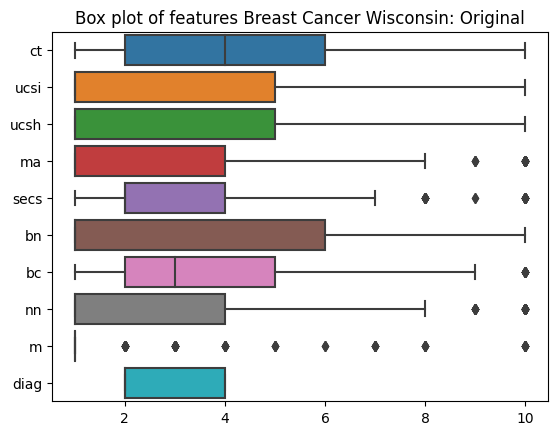

In [22]:
#boxplot1
plt.figure()
plt.title('Box plot of features Breast Cancer Wisconsin: Original')
sns.boxplot(data=bc_orig, orient='h')
plt.show()

Plotting the boxplot for diag as it has many outliers

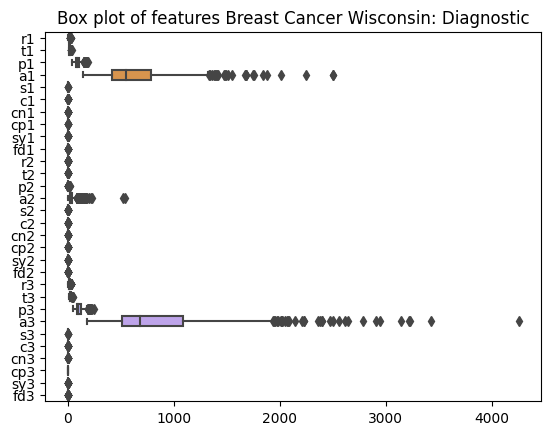

In [23]:
plt.figure()
plt.title('Box plot of features Breast Cancer Wisconsin: Diagnostic')
sns.boxplot(data=bc_diag, orient='h')
plt.show()

Removing the outliers

In [24]:
#removing outliers
print("shape before:", bc_diag.shape)

for col in bc_diag.columns:
  if col == 'diag':
    continue
  q1 = bc_diag[col].quantile(0.25)
  q3 = bc_diag[col].quantile(0.75)
  iqr = q3-q1

  bc_diag = bc_diag[(bc_diag[col] >= (q1 - 1.5*iqr)) & (bc_diag[col] <=(q3 + 1.5*iqr))]

print("shape after:", bc_diag.shape)

shape before: (569, 31)
shape after: (277, 31)


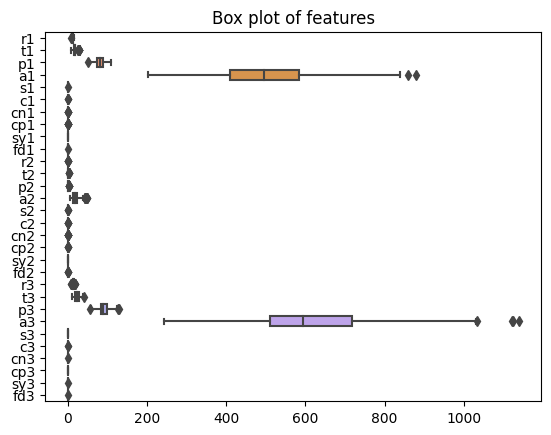

In [25]:
plt.figure()
plt.title('Box plot of features')
sns.boxplot(data=bc_diag, orient='h')
plt.show()

Dropping all null values for orig dataset

In [26]:
print("shape before (orig):", bc_orig.shape)
print("null entires in orig: ", bc_orig.isnull().values.any())
print()

bc_orig = bc_orig.dropna()
print("null entires in diag after: ", bc_diag.isnull().values.any())
print()

print("shape after (orig):", bc_orig.shape)

shape before (orig): (699, 10)
null entires in orig:  True

null entires in diag after:  False

shape after (orig): (683, 10)


Before cleaning:

*  Shape of the original: (699, 10)

*  Shape of the diagnostic: (569, 31)

After cleaning:

*  Shape of the original: (683, 10)
*  Shape of the diagnostic: (277, 31)

# 3. Exploratory data analysis

## Dataset 1:

Datatypes of bc_orig
ct        int64
ucsi      int64
ucsh      int64
ma        int64
secs      int64
bn      float64
bc        int64
nn        int64
m         int64
diag      int64
dtype: object

Number of rows and columns in bc_orig
Number of rows: 683
Number of columns: 10
Point biserial correlation coefficient of each cell attribute with the 
diagnosis column of 'diag'. 
This is done instead of a normal correlation as the diagnosis column has
 binary values(2 or 4), so a correlation between a binary column
 and continuous column is best done using point biserrial correlation
      correlation
ucsi     0.820801
ucsh     0.821891
ma       0.706294
secs     0.690958
bn       0.822696
bc       0.758228
nn       0.718677
m        0.423448
Heat map of correlation matrix


<Axes: >

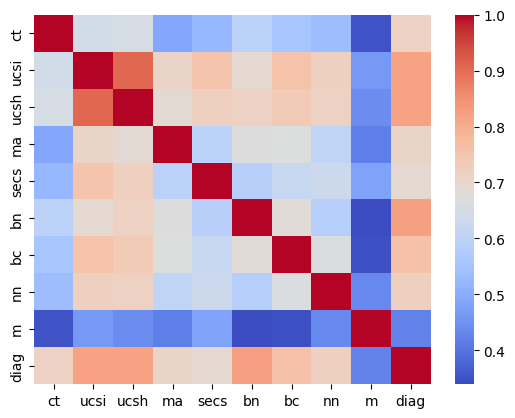

In [27]:
#EDA bc_orig
from scipy import stats
import seaborn as sns
print("Datatypes of bc_orig")
print(bc_orig.dtypes)
print()

print("Number of rows and columns in bc_orig")
num_rows, num_cols = bc_orig.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

print("Point biserial correlation coefficient of each cell attribute with the ") 
print("diagnosis column of 'diag'. ")
print("This is done instead of a normal correlation as the diagnosis column has")
print(" binary values(2 or 4), so a correlation between a binary column")
print(" and continuous column is best done using point biserrial correlation")
pb_corr = []
for col in bc_orig.columns[1:]:
    if col == 'diag':
        continue
    corr = stats.pointbiserialr(bc_orig[col], bc_orig['diag']).correlation
    pb_corr.append((col, corr))
table = pd.DataFrame(pb_corr, columns=['feature', 'correlation'])
table = table.set_index('feature')
table.index.name = None
print(table)

print("Heat map of correlation matrix")
corr_matrix = bc_orig.corr(method=lambda x, y: stats.pointbiserialr(x, y)[0])
sns.heatmap(corr_matrix, cmap='coolwarm')



## Dataset 2:

The data as seen before consists of all floats for all 10 features for each of the 3 cells.

Information about the columns and size has been discussed above.

Taking a look at the correlations between the first 10 columns only, as all 30 are just 10 features for each of the 3 cells, thus taking a look at first 10 will give insights on each cell feature realting with each other and will be reflected by the next pair of 10 columns also.

Hypothesis: Radius of the cancer cell has a direct impact on the tendency of the cancer

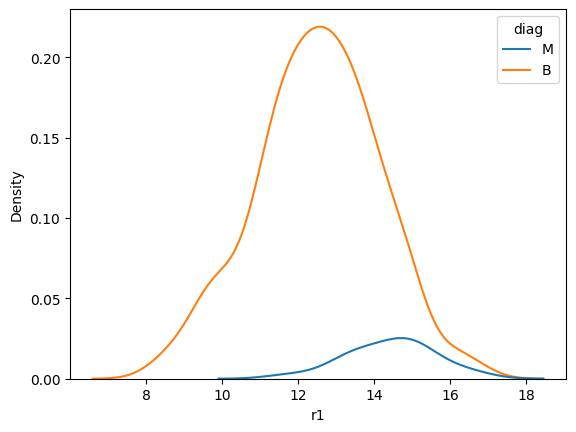

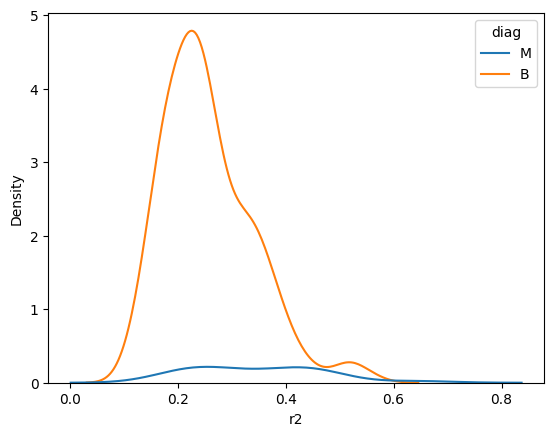

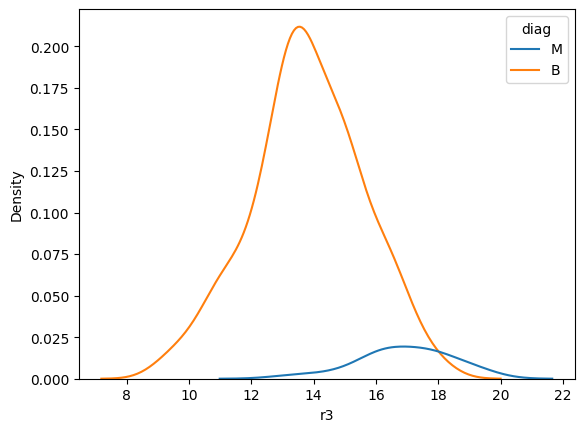

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

r_arr = ['r1', 'r2', 'r3']

for r in r_arr:
  sns.kdeplot(data = bc_diag, x = r, hue = 'diag')
  plt.show()

As we can clearly see, the malignant cells have a larger radius than the ones that are benign. The number of cell entries for benign are much more than  malignant are, but the pattern is clearly visible.

Now plotting a pairplot to see the same for all features

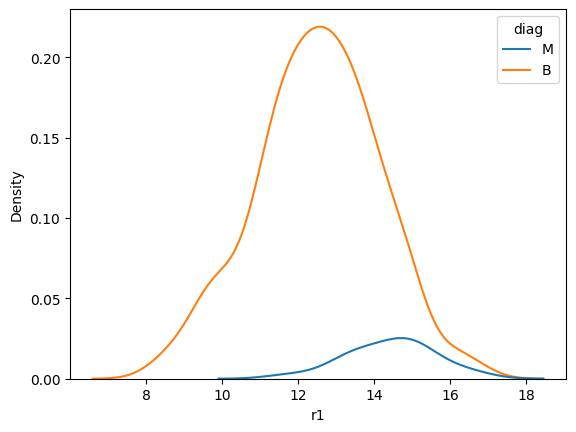

<Figure size 200x200 with 0 Axes>

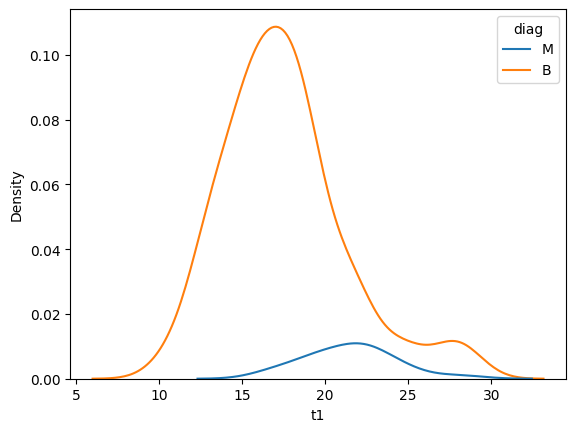

<Figure size 200x200 with 0 Axes>

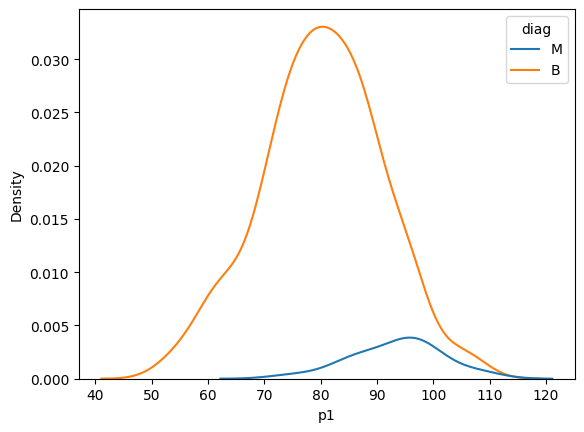

<Figure size 200x200 with 0 Axes>

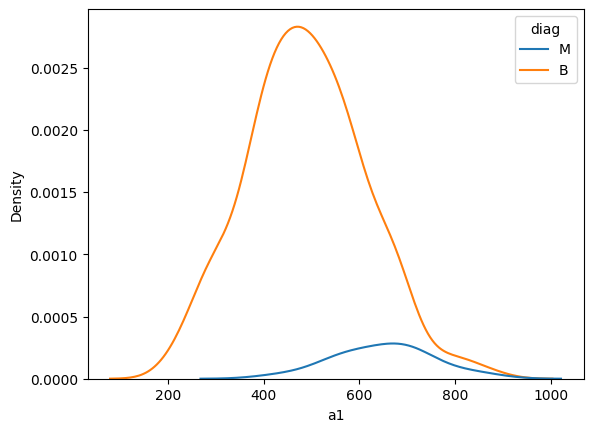

<Figure size 200x200 with 0 Axes>

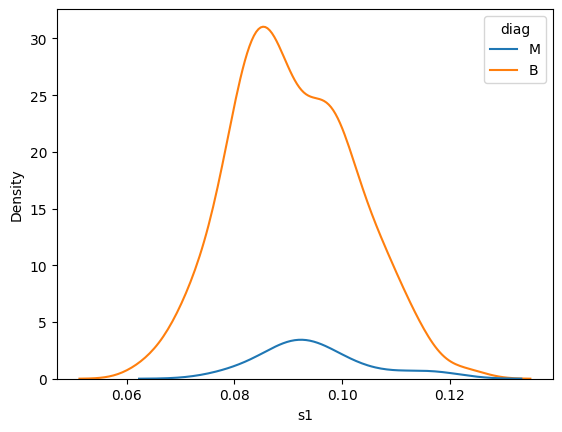

<Figure size 200x200 with 0 Axes>

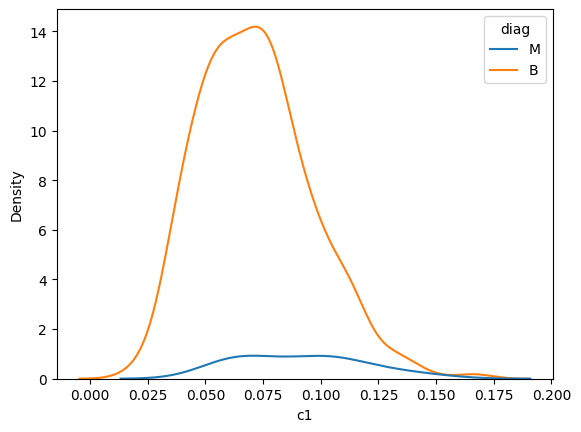

<Figure size 200x200 with 0 Axes>

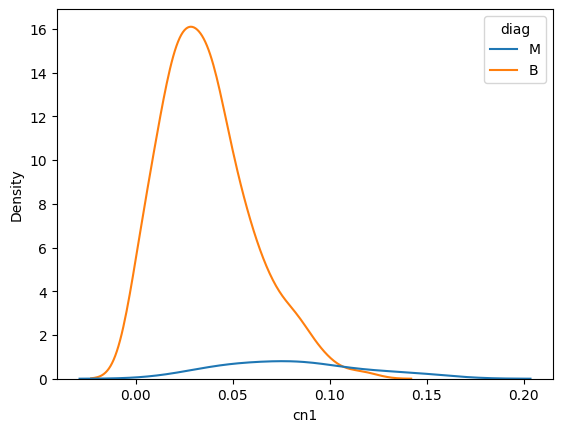

<Figure size 200x200 with 0 Axes>

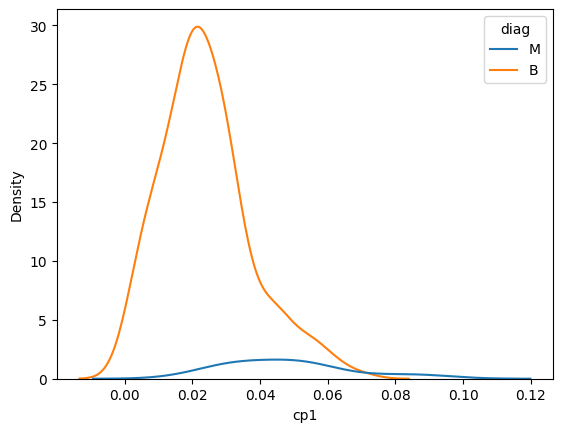

<Figure size 200x200 with 0 Axes>

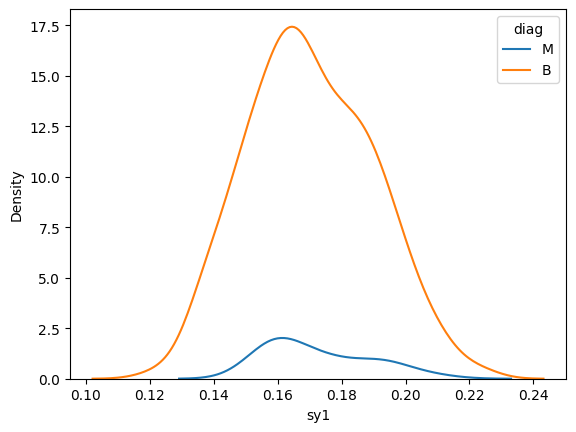

<Figure size 200x200 with 0 Axes>

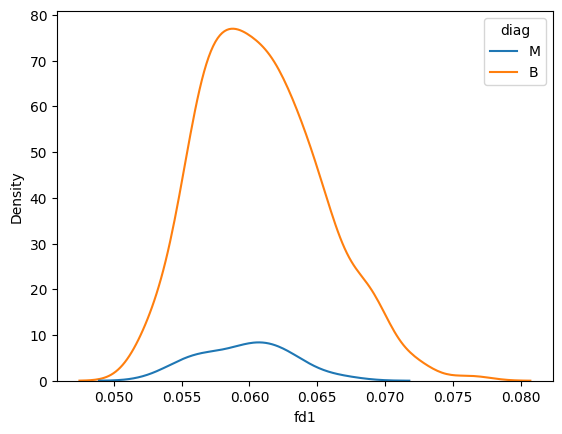

<Figure size 200x200 with 0 Axes>

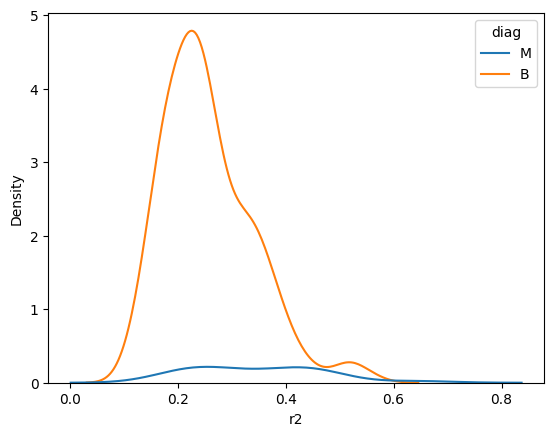

<Figure size 200x200 with 0 Axes>

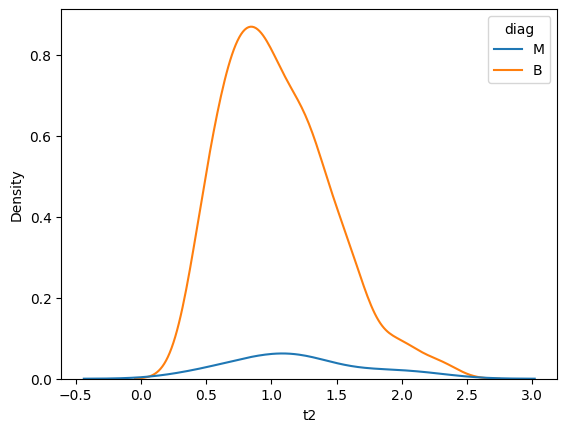

<Figure size 200x200 with 0 Axes>

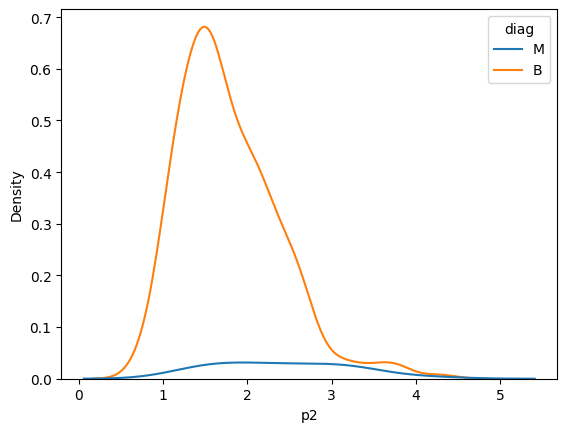

<Figure size 200x200 with 0 Axes>

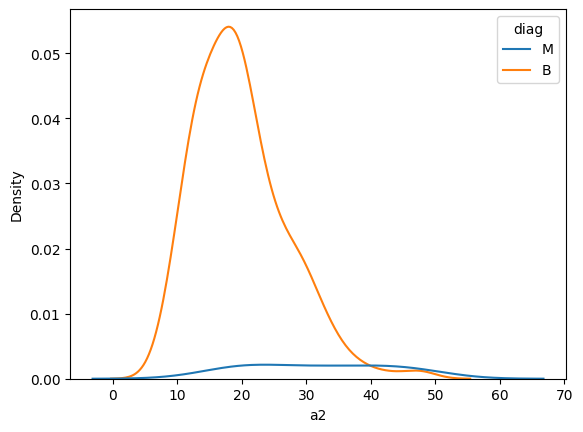

<Figure size 200x200 with 0 Axes>

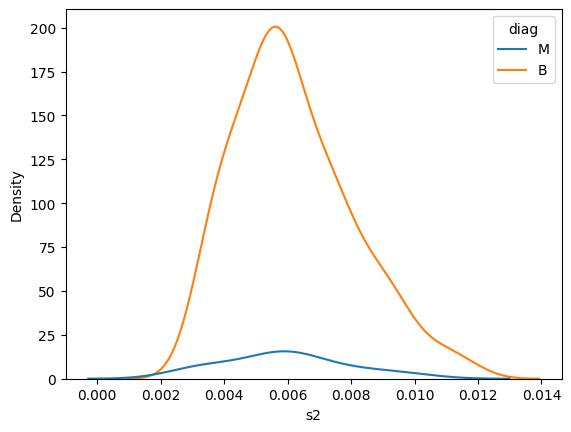

<Figure size 200x200 with 0 Axes>

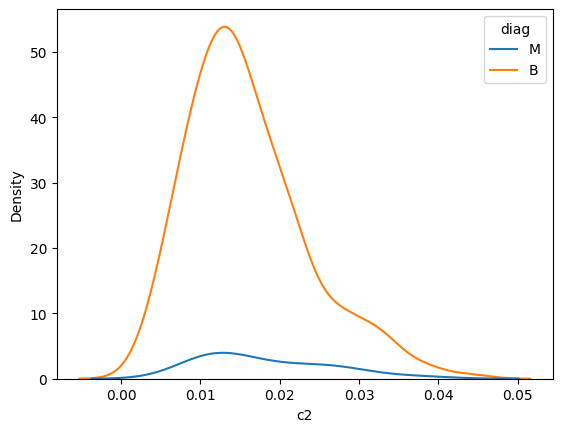

<Figure size 200x200 with 0 Axes>

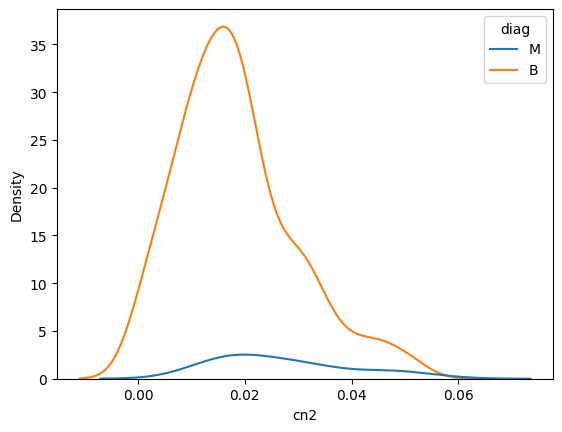

<Figure size 200x200 with 0 Axes>

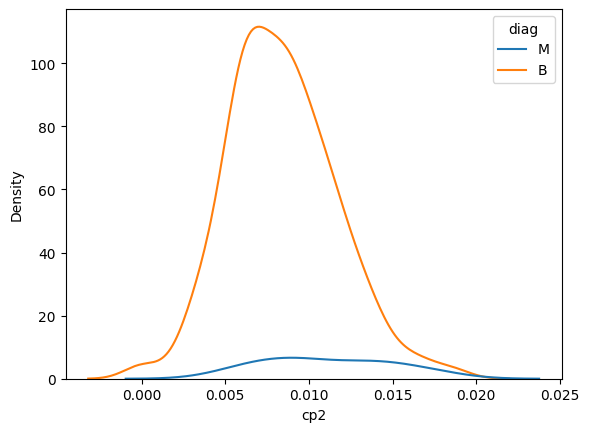

<Figure size 200x200 with 0 Axes>

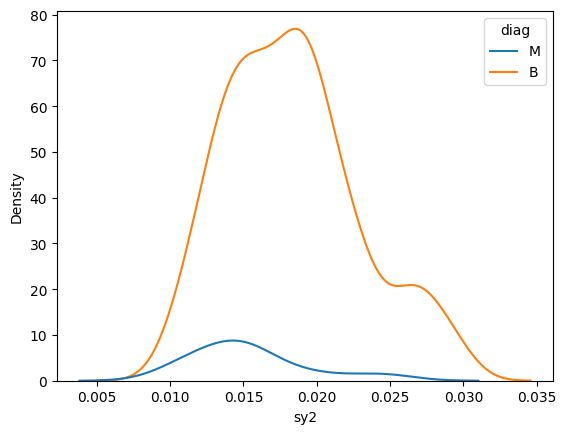

<Figure size 200x200 with 0 Axes>

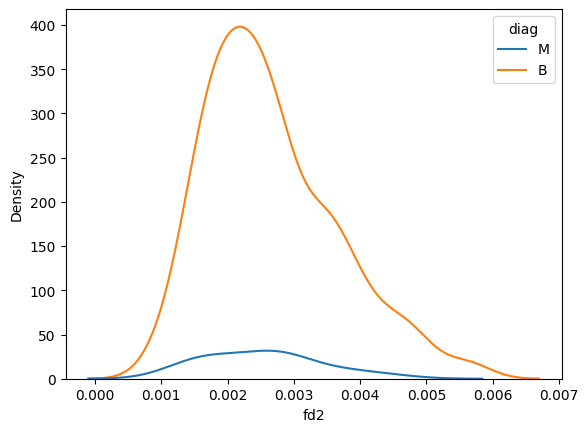

<Figure size 200x200 with 0 Axes>

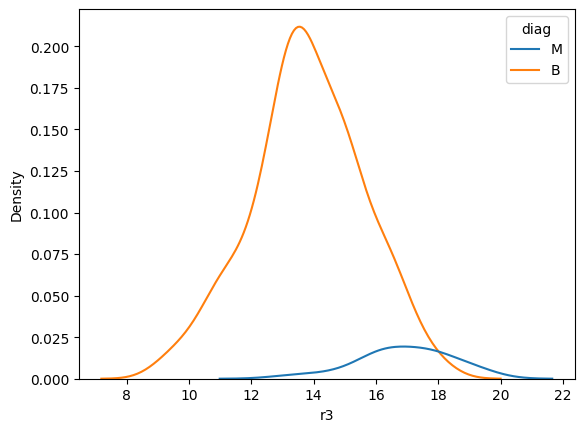

<Figure size 200x200 with 0 Axes>

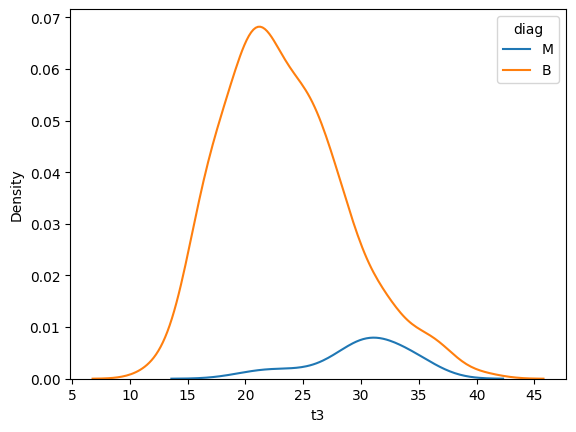

<Figure size 200x200 with 0 Axes>

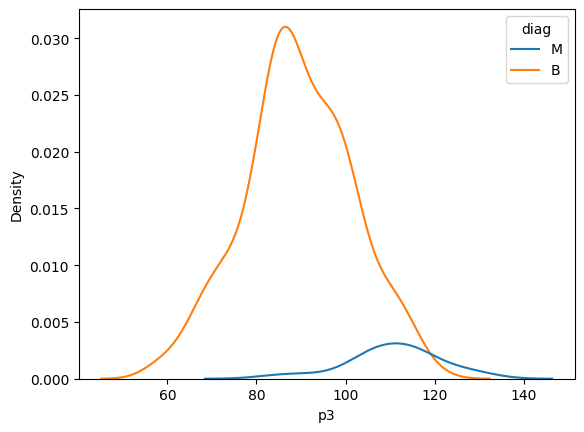

<Figure size 200x200 with 0 Axes>

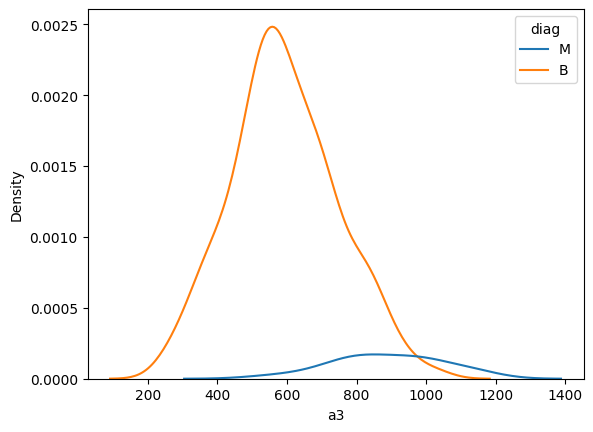

<Figure size 200x200 with 0 Axes>

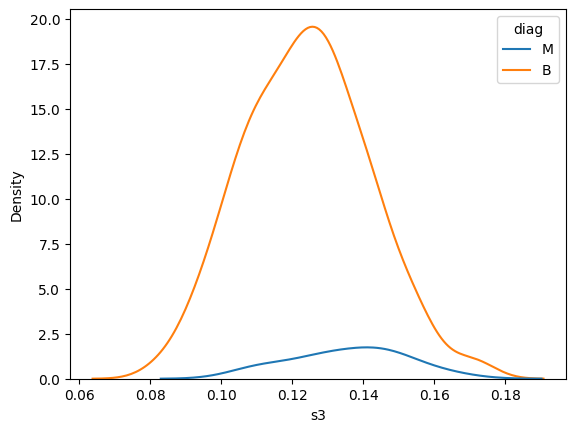

<Figure size 200x200 with 0 Axes>

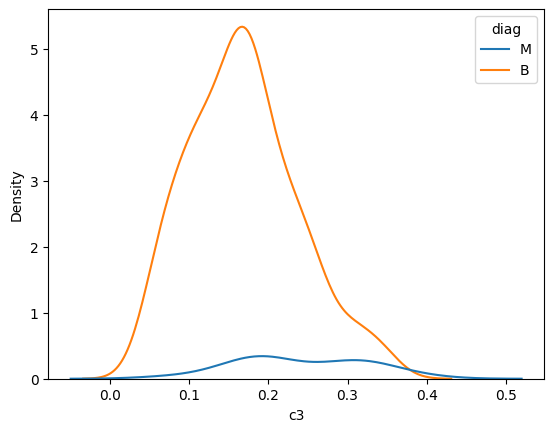

<Figure size 200x200 with 0 Axes>

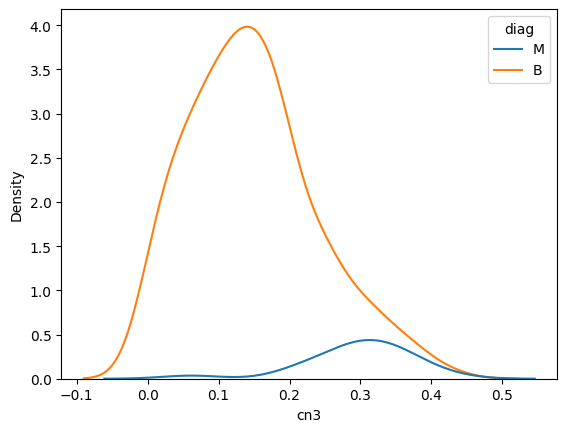

<Figure size 200x200 with 0 Axes>

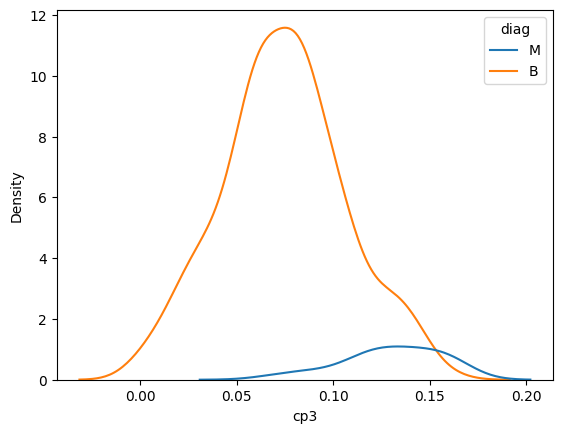

<Figure size 200x200 with 0 Axes>

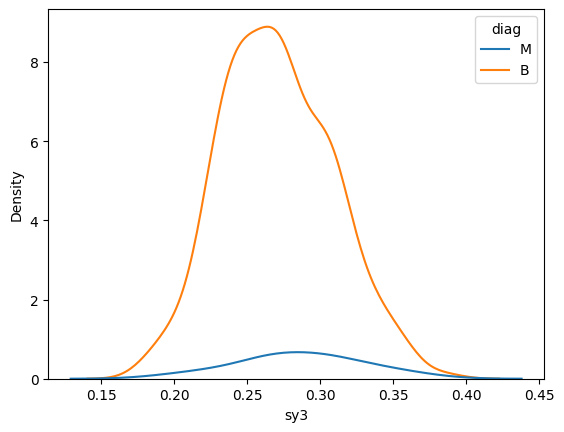

<Figure size 200x200 with 0 Axes>

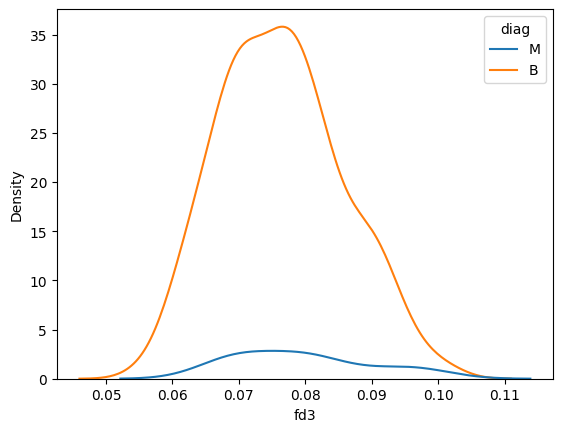

<Figure size 200x200 with 0 Axes>

In [29]:
for feature in bc_diag.columns:
  if feature == 'diag':
    continue
  sns.kdeplot(data = bc_diag, x = feature, hue = 'diag')
  plt.figure(figsize=(2,2))
  plt.show()

As can be seen above, some features do not have a clear affect on the malignancy such as fractal dimensions, symmetry, compactness, smoothness. Thus they should be removed before being used in the machine learning

In [30]:
print("features before:", bc_diag.columns)

bc_diag.drop(columns = ['fd3', 'fd2', 'fd1', 'sy3', 'sy2', 'sy1', 'c3', 'c2', 'c1', 's3', 's2', 's1'], inplace = True)

print("features after:", bc_diag.columns)

features before: Index(['diag', 'r1', 't1', 'p1', 'a1', 's1', 'c1', 'cn1', 'cp1', 'sy1', 'fd1',
       'r2', 't2', 'p2', 'a2', 's2', 'c2', 'cn2', 'cp2', 'sy2', 'fd2', 'r3',
       't3', 'p3', 'a3', 's3', 'c3', 'cn3', 'cp3', 'sy3', 'fd3'],
      dtype='object')
features after: Index(['diag', 'r1', 't1', 'p1', 'a1', 'cn1', 'cp1', 'r2', 't2', 'p2', 'a2',
       'cn2', 'cp2', 'r3', 't3', 'p3', 'a3', 'cn3', 'cp3'],
      dtype='object')


# 4. ML Models, Visualizations & Results

## Model planning

##Dataset 1

Since the original dataset consists of 10 columns with each column having integer values from 1-10, it becomes a challenge to use machine learning models like that use regression or any other mathematical analysis that entail having numerical data. Thus this classifies as a classification problem.

Classification makes sense as each of the columns have integers from 1-10 and each integer may somtimes be a natural choice along the way to differentiate from benign to malignant cells. Some of the ML tasks are written below:

1. Naive Bayes
2. Decision Trees
3. Random Forests


##Dataset 2

Since all the 30 columns are float types, regression becomes a logical choice as each value indicates adds to the gravity of the value range for each type: Benign, Malignant. Some regression choices based on our data is given below:

1. Linear Regression
2. Logistic Regression
3. Bayesian Regression

Bayesion regression would make better sense as each value will enatil a probability with the as to how probable the malignancy or benignity is. As we saw for the radius, more the radius, more the probability of the malignancy.


## Dataset 1 ML Models/Visualizations:

Naive Bayes CV scores: [1.         0.95833333 0.97916667 0.97916667 1.         0.875
 0.95833333 0.9375     0.9787234  0.91489362]
Naive Bayes CV mean score: 0.9581117021276595
 
Decision Trees CV scores: [0.97916667 0.875      0.95833333 0.9375     0.95833333 0.91666667
 0.91666667 0.85416667 0.9787234  0.93617021]
Decision Trees CV mean score: 0.931072695035461
 
Random Forests CV scores: [1.         0.9375     0.95833333 0.95833333 0.97916667 0.89583333
 0.95833333 1.         0.9787234  0.93617021]
Random Forests CV mean score: 0.9602393617021278
 
Naive Bayes Accuracy: 0.975609756097561
Decision Tree Accuracy: 0.9609756097560975
Random Forest Accuracy: 0.9804878048780488
 
Classification report Naive Bayes:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       131
           4       0.95      0.99      0.97        74

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.97       205
weighte

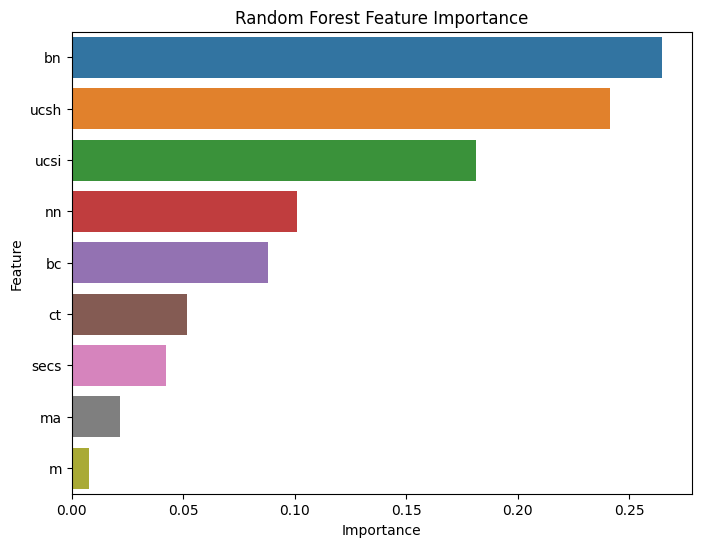

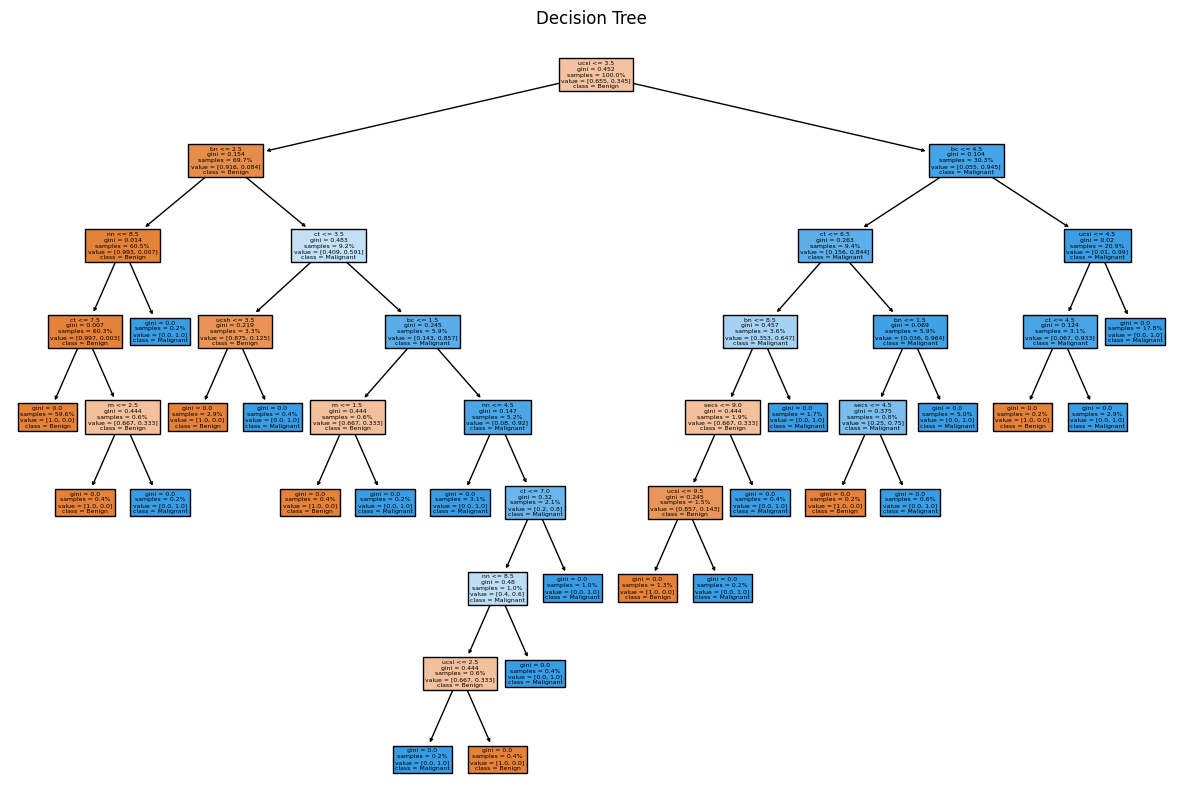

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = bc_orig.iloc[:, :-1] # extracts all the other columns besides the diagnosis
y = bc_orig.iloc[:, -1] # extracts only the last column, which is the diagnosis/target
# print(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Naive Bayes
nb = GaussianNB()
scores = cross_val_score(nb, X_train, y_train, cv=10) # cross validation
print("Naive Bayes CV scores:", scores)
print("Naive Bayes CV mean score:", np.mean(scores))
print(" ")
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

# Decision Trees
dt = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(dt, X_train, y_train, cv=10) # cross validation
print("Decision Trees CV scores:", scores)
print("Decision Trees CV mean score:", np.mean(scores))
print(" ")
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Random Forests
rf = RandomForestClassifier(random_state=10)
scores = cross_val_score(rf, X_train, y_train, cv=10) # cross validation
print("Random Forests CV scores:", scores)
print("Random Forests CV mean score:", np.mean(scores))
print(" ")
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Print accuracies
print("Naive Bayes Accuracy:", nb_acc)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)
print(" ")

print("Classification report Naive Bayes:")
print(classification_report(y_test, nb_pred))
print("Classification report Decision Trees:")
print(classification_report(y_test, dt_pred))
print("Classification report Random Forests:")
print(classification_report(y_test, rf_pred))

# Print feature importances for Decision Trees and Random Forests
print("Decision Tree Feature Importances:")
for feature_name, feature_importance in zip(X.columns, dt.feature_importances_):
    print(feature_name, ":", feature_importance)

print(" ")

print("Random Forest Feature Importances:")
for feature_name, feature_importance in zip(X.columns, rf.feature_importances_):
    print(feature_name, ":", feature_importance)
    
print(" ")

# Plot feature importance for Decision Trees and Random Forests
feat_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances.sort_values(by='Importance', ascending=False))
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, proportion=True)
plt.title('Decision Tree')
plt.show()


## Dataset 1 Results:
All 3 of the classification models result in very similar accuracies. Random forest however is consistently more accurate than decision trees as it combines multiple decision trees.

To start I separated my X and y, where X is all the features that contribute to the classification, and the y is the actual classification of malignant or benign. I then split the data into 30-70, training and test. then for each ML model I did a 10 fold cross validation to ensure that the accuracy is calculated on different splits of the data and reduces the effect of randomness in the data split. I also added a random seed to ensure the reproducibility of the results.

After running the predict and calculating the accuracies, I wanted to see what features ended up being the most important in determining whether its malignent or benign. This can help us solve the research question of. Does having a larger cell nucleus, radius and size amount to higher probability of malignant cancer? So to do this scikit decision trees and random forests have a builtin function called feature_importances_ that do exactly what we need. However, Naive Bayes doesn't provide feature importance as it assumes that all features are independent of each other. We see in fact that cell size is only the 3rd most important feature. in fact the cell shape and bare nuclei have a greater influence on wether or not a cell is malignent or benign. This can also be seen with the decision tree.

In addition, we also printed the classification report, and something important to note is that Naive Bayes has a better recall than both decision trees and random forests. This is important as recall is the proportion of true positives (correctly identified malignant cases) out of all actual positives (all malignant cases). It is more dangerous to miss a malignant case(false negative) than incorrectly diagnosing a benign case (false positive)

#Dataset 2: Diagnostic

Will be using Stratification thoughout


In [32]:
import numpy as np

x = bc_diag.iloc[:, 1:]
y = bc_diag.iloc[:, 0]

y.replace('M', 1, inplace = True)
y.replace('B', 0, inplace = True)


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=169, stratify=y)

Trying Linear Regression without standardization

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

lreg = LinearRegression()

scores = cross_val_score(lreg, x_train, y_train, cv = 5) # 5 fold cross validation
print("Linear Regression w/o stand. CV mean:", scores.mean())

lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

print("Linear regression w/o stand. accuracy:", lreg.score(x_test, y_test))
print("Linear regression w/o stand. MSE:", mean_squared_error(y_test, y_pred))

Linear Regression w/o stand. CV mean: 0.2742839152787916
Linear regression w/o stand. accuracy: 0.4157187361268764
Linear regression w/o stand. MSE: 0.038753349134441874


As we can see, it says it has a 40% accuracy, which seems bad but isnt

0.03 Mean Squared error means that the predictions are very close to the actual values. We can say that because the Regression models dont typically give either 0 or 1 based on the input, but rather a value between 0 and 1 in this case. The closer the predicted value is to either 0 or 1 the more the chances of them being 0 or 1. Thus we use MSE to gauge that and a close to 0 MSE signifies that we have a good model

In [34]:
from sklearn.preprocessing import StandardScaler

y.replace('M', 1, inplace = True)
y.replace('B', 0, inplace = True)

sc = StandardScaler()
sc.fit(x)

old_x = x

x = sc.transform(x)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 169, stratify=y)

lreg = LinearRegression()

scores = cross_val_score(lreg, x_train, y_train, cv = 5) # 5 fold cross validation
print("Linear Regression w/ stand. CV mean:", scores.mean())

lreg.fit(x_train, y_train)

y_pred = lreg.predict(x_test)

print("Linear regression w/ stand. accuracy:", lreg.score(x_test, y_test))
print("Linear regression w/o stand. MSE:", mean_squared_error(y_test, y_pred))

Linear Regression w/ stand. CV mean: 0.27428391527880136
Linear regression w/ stand. accuracy: 0.41571873612688026
Linear regression w/o stand. MSE: 0.03875334913444161


As it appears, there is no difference after standardization


But lets see the difference in the boxplots from before and after standardization.

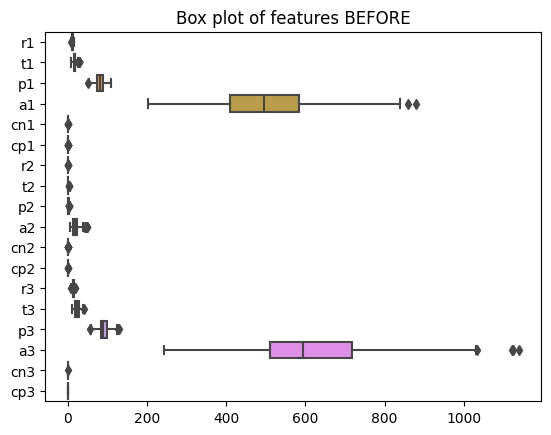

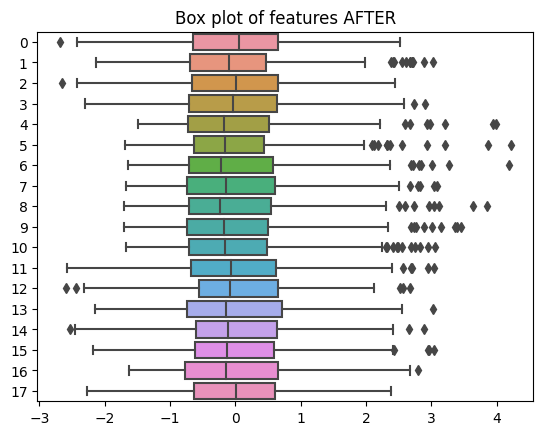

In [35]:
# figure, ax = plt.subplots(ncols = 2, figsize = (60, 15))

plt.figure()
plt.title('Box plot of features BEFORE')
sns.boxplot(data=old_x, orient='h')

plt.figure()
plt.title('Box plot of features AFTER')
sns.boxplot(data=x, orient='h')
plt.show()

Clearly all the features are now standardized and that makes the regression faster and better

Trying Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

scores = cross_val_score(logreg, x_train, y_train, cv = 5) # 5 fold cross validation
print("Logistic Regression w/ stand. CV mean:", scores.mean())

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print("Logistic regression w/ stand. accuracy:", logreg.score(x_test, y_test))
print("Logistic regression w/ stand. MSE:", mean_squared_error(y_test, y_pred))

Logistic Regression w/ stand. CV mean: 0.9548484848484848
Logistic regression w/ stand. accuracy: 0.9642857142857143
Logistic regression w/ stand. MSE: 0.03571428571428571


A significant improvement in terms of reported score over the linear regression with higher mean cross validation scores which show consistency and 95% overall accuracy and MSE of 0.035 as compared to 0.038

Now lets try Bayesian Ridge regression

In [37]:
from sklearn import linear_model

bysreg = linear_model.BayesianRidge()

scores = cross_val_score(bysreg, x_train, y_train, cv = 5) # 5 fold cross validation
print("Bayesian Ridge w/ stand. CV mean:", scores.mean())

bysreg.fit(x_train, y_train)

y_pred = bysreg.predict(x_test)

print("Bayesian Ridge w/ stand. accuracy:", bysreg.score(x_test, y_test))
print("Bayesian Ridge w/ stand. MSE:", mean_squared_error(y_test, y_pred))

Bayesian Ridge w/ stand. CV mean: 0.32029995722759114
Bayesian Ridge w/ stand. accuracy: 0.41113861495377035
Bayesian Ridge w/ stand. MSE: 0.03905713268163768


As we can see, Bayesian Ridge classifier does similar as compared to both Logistic regression and Linear regression in terms of MSE, but has similar reported score accuracy.

Overall Logistic regression does the best of out of the three and this is due to the fact that Logistic regression is a classification model that uses regression whereas the other two are pure regression models that give out values between 0 and 1. Thus the reported scores are much better for logistic regression, but all of them have a lower MSE.

Lets try out using Logistic Regression and RFE to see what features hold the most importance and compare the MSE for each iteration

1 : ['p3']
2 : ['p3', 'cn3']
3 : ['r3', 'p3', 'cn3']
4 : ['cp1', 'r3', 'p3', 'cn3']
5 : ['cp1', 'r3', 'p3', 'a3', 'cn3']
6 : ['cp1', 'a2', 'r3', 'p3', 'a3', 'cn3']
7 : ['cn1', 'cp1', 'a2', 'r3', 'p3', 'a3', 'cn3']
8 : ['cn1', 'cp1', 'a2', 'cp2', 'r3', 'p3', 'a3', 'cn3']
9 : ['t1', 'cn1', 'cp1', 'a2', 'cp2', 'r3', 'p3', 'a3', 'cn3']
10 : ['r1', 't1', 'cn1', 'cp1', 'a2', 'cp2', 'r3', 'p3', 'a3', 'cn3']
11 : ['r1', 't1', 'cn1', 'cp1', 'p2', 'a2', 'cp2', 'r3', 'p3', 'a3', 'cn3']
12 : ['diag', 'r1', 't1', 'cn1', 'cp1', 'p2', 'a2', 'cp2', 'r3', 'p3', 'a3', 'cn3']
13 : ['diag', 'r1', 't1', 'a1', 'cn1', 'cp1', 'p2', 'a2', 'cp2', 'r3', 'p3', 'a3', 'cn3']
14 : ['diag', 'r1', 't1', 'a1', 'cn1', 'cp1', 'p2', 'a2', 'cp2', 'r3', 't3', 'p3', 'a3', 'cn3']
15 : ['diag', 'r1', 't1', 'a1', 'cn1', 'cp1', 't2', 'p2', 'a2', 'cp2', 'r3', 't3', 'p3', 'a3', 'cn3']
16 : ['diag', 'r1', 't1', 'a1', 'cn1', 'cp1', 't2', 'p2', 'a2', 'cn2', 'cp2', 'r3', 't3', 'p3', 'a3', 'cn3']
17 : ['diag', 'r1', 't1', 'p1', 'a1', '

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff7e194d720>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff7e194dc60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff7e194d480>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff7e194e1a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7e194e440>,
 'means': []}

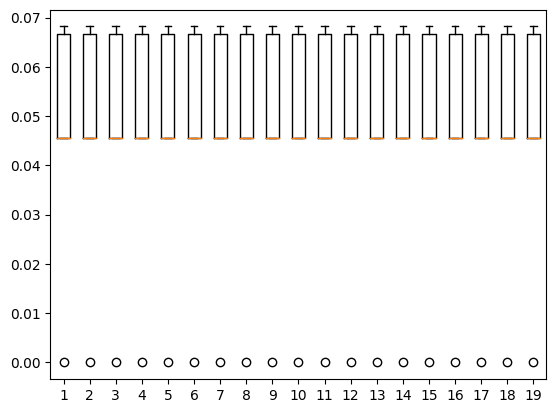

In [38]:
from sklearn.feature_selection import RFE


def func(num_features, ratio):
  m = LogisticRegression()

  m.fit(x_train, y_train)

  rfe = RFE(estimator = m, n_features_to_select = num_features, step = 1)

  rfe.fit(x_train, y_train)

  temp = rfe.get_support(True)

  temp2 = [bc_diag.columns[x] for x in temp]

  print(num_features, ":", temp2)

  m2 = LogisticRegression()

  sc = cross_val_score(m2, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

  sc2 = np.array(sc)
  sc2 = -1*sc2

  return sc2

mses = {}

size = bc_diag.columns.size

for i in range(1, size+1):
  mses[i] = func(i, 0.8)

for i in range(1, 14):
  print(i, ':', np.average(mses[i]))

plt.boxplot(mses.values(), labels = mses.keys())

Thus, as we can see ['cp1', 'r3', 'p3', 'cn3'] are some of the most important features as selected by RFE

cp = concave points

r = radius

p = perimeter

cn = concavity

Thus this matches and answers both our research questions about the radius and concave points

#Results

The observations we see through our data exploration and machine learning models help us answer the Research Questions we begun with


1. Does having a larger cell nucleus, radius and size amount to higher probability of malignant cancer?

Answer: Yes, radius is clearly the 3rd most important feature recognized by both the datasets and members. The radius for malignant cancer cells is larger when compared to benign cancer cells. Although, the other most important features are bare nuclei, concavity and the shape.



2. Does having a worse texture indicate that the cancer cells are more concave/have more concave points, does it have a positive correlation with the tendency of the cancer?

Answer: Yes, based on the results of the regression and classification tasks, texture and concavity + concave points are clearly important features and have a strong influence on the tendency of cancer


The Machine Learning models we have built have good accuracy and can definitely help doctors visualize and assess the cell features to derive a better diagnosis. This has the potential to make a huge impact on the medical practices and help lots of patients by using  hospital's confedential data to make in-house models better.

# REFERENCES

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

https://docs.scipy.org/doc/scipy/reference/stats.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html